**Using boto3 to connect to s3 through IAM role keys and import data stored in s3**

In [37]:
import pandas as pd
import boto3

In [38]:
#Defining s3 client through IAM role keys
s3_client = boto3.client('s3', aws_access_key_id="", aws_secret_access_key="")
#listing the buckets present in s3
bucketResponse = s3_client.list_buckets()
print('Buckets stored in s3:')
for bucket in bucketResponse['Buckets']:
    print(f'{bucket["Name"]}')

Buckets stored in s3:
twittersentimenttweet


In [39]:
#listing the files present in bucket
bucketResponse = s3_client.list_objects(Bucket='twittersentimenttweet')
print('Files stored in Bucket:')
for content in bucketResponse['Contents']:
    print(content['Key'])

Files stored in Bucket:
Twitter_Data.csv
twitter_sentiment_tweet.csv


In [40]:
#Read csv files in the bucket
objectResponse = s3_client.get_object(Bucket='twittersentimenttweet', Key='Twitter_Data.csv')
df = pd.read_csv(objectResponse['Body'])
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


**Visualize the dataset**

category represents the polarity of the tweet where -1 = negative, 0 = neutral, 1 = positive

In [41]:
import matplotlib.pyplot as plt

In [42]:
polarity = df['category'].value_counts()

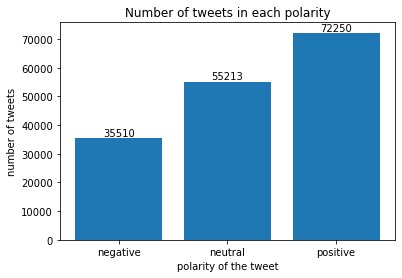

In [45]:
#Visualizing histogram depicting number of tweets in each sentiment.
bar = plt.bar(['negative', 'neutral', 'positive'], [polarity[-1], polarity[0], polarity[1]])
plt.bar_label(bar)
plt.xlabel('polarity of the tweet')
plt.ylabel('number of tweets')
plt.title('Number of tweets in each polarity')
plt.show()